In [1]:
import sys
sys.path.append('..')

In [2]:
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm

from lib.data import load_extracted_samples
from lib.ocr import OCRParams, get_ocrs, run_ocr_sample

In [3]:
samples = load_extracted_samples()
samples = [s for s in samples if len(s["text"]) == 0]

In [4]:
params = [
    OCRParams(engine="paddleocr", deskew=True),

    # raw
    #OCRParams(engine="paddleocr"),
    #OCRParams(engine="easyocr"),
    #OCRParams(engine="tesseract"),

    ## threshold
    #OCRParams(engine="tesseract", grayscale=True, threshold=150),
    #OCRParams(engine="tesseract", grayscale=True, threshold=170),
    #OCRParams(engine="tesseract", grayscale=True, threshold=190),
    #OCRParams(engine="tesseract", grayscale=True, threshold=210),
    #
    #OCRParams(engine="easyocr", grayscale=True, threshold=240),
]

for sample in tqdm(samples):
    for param in params:
        run_ocr_sample(sample, param)

  0%|          | 0/6294 [00:00<?, ?it/s]

Initializing PaddleOCR instance...


100%|██████████| 6294/6294 [21:26:56<00:00, 12.27s/it]   


Mostar y verificar

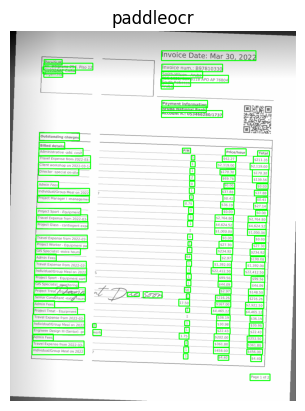

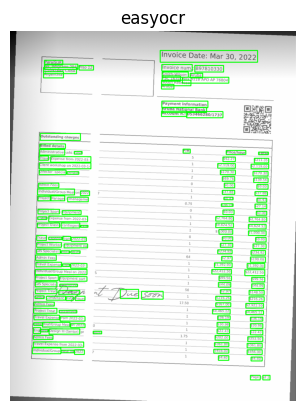

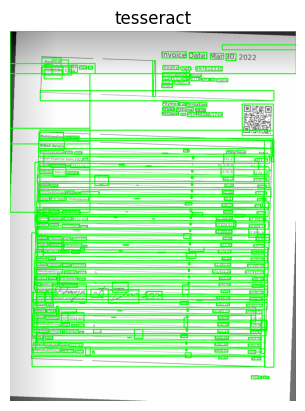

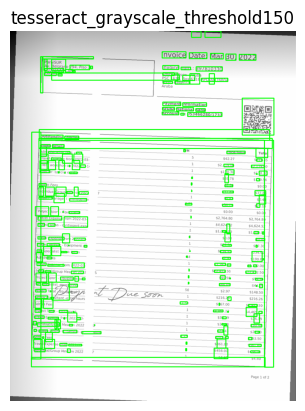

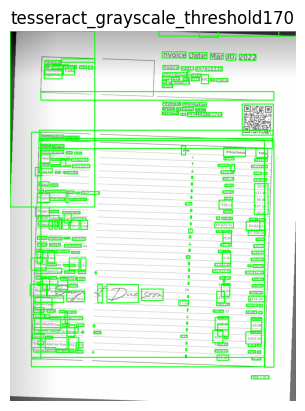

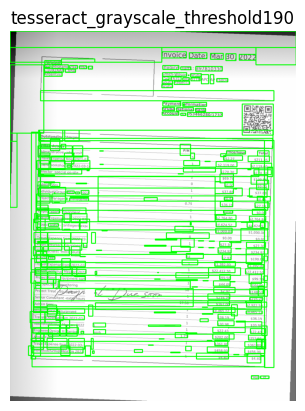

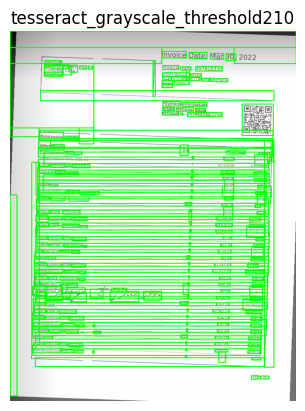

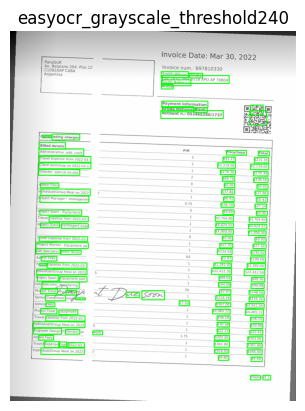

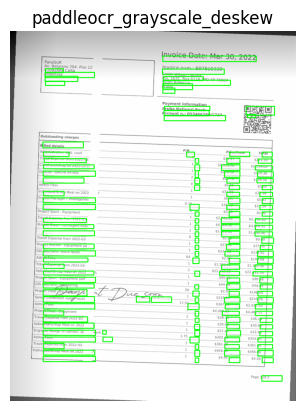

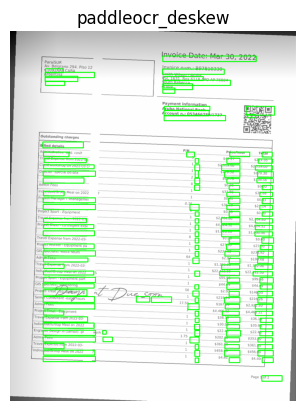

In [5]:
sample = samples[1]
page = 0
image_path = sample["images"][page]
ocrs = get_ocrs(sample)

if ocrs is not None:
    for engine, pages in ocrs.items():
        ocr = pages[page]["boxes"]

        image = cv2.imread(image_path)

        for item in ocr:
            box = item["bounds"]
            cv2.rectangle(image, box[0], box[2], (0, 255, 0), 2)

        cv2.imwrite(f"../sample_ocr/{engine}.png", image)
        
        plt.figure()
        plt.title(f"{engine}")
        plt.axis("off")
        plt.imshow(image[:,:,::-1])
